In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
print(len(session_grouped))
print(len(X))
print(len(Y))
print(len(X)+len(Y))

NameError: name 'session_grouped' is not defined

In [3]:
# get airbnb & test csv files as a DataFrame
train_users  = pd.read_csv('../input/train_users_2.csv')
session_df = pd.read_csv('../input/sessions.csv')
test_users    = pd.read_csv('../input/test_users.csv')

In [5]:
all_users = pd.concat([train_users,test_users],axis=0,ignore_index=True)

In [91]:
i = 0

In [6]:
all_users.shape

(275547, 16)

In [98]:
session_df['secs_elapsed'].fillna(0,inplace=True) # Most missing times are for create, authenticate, and index actions.

In [99]:
session_grouped = session_df.groupby('user_id').agg({'action': 'count',
                                                    'device_type':'first',
                                                    'secs_elapsed':sum})

In [320]:
session_df.head(2)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,minutes_elapsed,hours_elapsed,days_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319,5,0.1,0.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753,1129,18.8,0.8


In [318]:
session_action_large = session_df[session_df['secs_elapsed']>3*3600].groupby('user_id')

In [351]:
num_devices = session_df.groupby('user_id')['device_type'].agg(lambda x: len(np.unique(x.values)))
num_devices

user_id
00023iyk9l    2
0010k6l0om    1
001wyh0pz8    1
0028jgx1x1    2
002qnbzfs5    2
0031awlkjq    1
0035hobuyj    1
00378ocvlh    1
00389675gq    2
003iamz20l    1
0048rkdgb1    1
0057snrdpu    2
005jc3nbmb    2
005v5uf4dh    1
0063bawn05    1
006ml14zc1    1
006mls2sjw    1
006t3vhawl    1
006z8b0uws    2
0075z9e9xv    2
007gj7kqdk    1
009a40t3dk    3
00a8dbifj8    1
00allnceb8    1
00an0o6c07    2
00b9hfwaak    1
00bn6hu437    1
00bowi9sn3    1
00bqkh0g5i    1
00bxmflswn    2
             ..
zzq90ckj2z    1
zzqb2sn066    2
zzr1rkdsh9    1
zzrnx9rqi5    1
zzsoxtv8zb    2
zzsslqqkee    1
zzsszlux3t    1
zzswqjsqy4    1
zzt5gpsyqa    2
zzt8w28nl5    2
zztaeo9wd5    2
zztkv1gkse    1
zzu3u71odh    1
zzu6ezwap2    2
zzunwylrfv    3
zzuy4rvdki    1
zzv6z6rjr9    1
zzv8sgicbk    1
zzvatt4dio    1
zzvg4emw5w    1
zzvr84im58    2
zzw7kydxfa    1
zzx06inhbv    1
zzx0hfd74v    1
zzx5wp3lqu    2
zzxox7jnrx    1
zzy7t0y9cm    1
zzysuoqg6x    1
zzywmcn0jv    1
zzzlylp57e    1
Name: device_typ

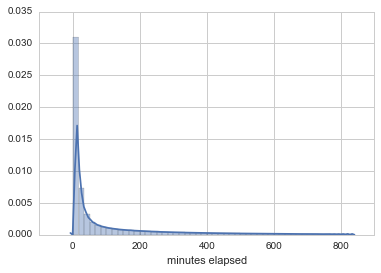

In [420]:
sns.distplot(session_df[session_df['secs_elapsed']<50000]['secs_elapsed']/60)
plt.xlabel('minutes elapsed')

In [376]:
user_af1

,num_device_types,num_sessions,num_days_active,total_session_time,avg_session_time,max_session_time,max_session_action,mean_session_action,mean_secs_per_action,max_between_session,mean_between_session
00023iyk9l,2,4,3,127804,3258.666667,4713.111111,18,9.250000,763.366667,567165,246697.333333
0010k6l0om,1,6,3,210700,2816.267983,5707.291667,24,9.666667,692.446809,127898,75168.600000
001wyh0pz8,1,2,1,232417,2825.486307,3184.944444,71,44.500000,993.458333,50548,50548.000000
0028jgx1x1,2,3,2,165126,5880.275000,6825.200000,16,9.666667,417.555556,84636,65942.000000
002qnbzfs5,2,24,15,2128886,NaN,NaN,148,31.916667,613.273632,1418284,189486.695652
0031awlkjq,1,1,1,39574,4946.750000,4946.750000,8,8.000000,1036.500000,NaN,NaN
0035hobuyj,1,27,15,1820755,NaN,NaN,95,17.148148,811.919444,1215345,150150.576923
00378ocvlh,1,8,5,344277,NaN,NaN,27,8.500000,887.613636,604179,211841.000000
00389675gq,2,21,10,588327,NaN,NaN,37,7.476190,642.763158,375543,100869.200000
003iamz20l,1,15,3,535816,NaN,NaN,58,9.933333,581.924370,312360,75315.714286


In [365]:
num_devices.shape

(135483,)

In [388]:
in_session_actions = session_df[session_df['secs_elapsed']<3600].groupby('user_id')
AA = in_session_actions['secs_elapsed'].agg({'total_session_times': np.sum,
                                        'mean_secs_per_action' : np.mean,
                                            'num_actions_insession' : np.size})

between_session_actions = session_df[session_df['secs_elapsed']>12*3600].groupby('user_id')
BB = between_session_actions['secs_elapsed'].agg({'num_sessions': np.size,
                                            'mean_between_sessions' : np.mean,
                                            'max_between_sessions': np.max
                                            })

SessionFeatures2 = pd.merge(AA,BB,how='outer',left_index=True,right_index=True)
#SessionFeatures2.merge(num_devices,how='outer',left_index=True,right_index=True)

SessionFeatures2['num_devices'] = session_df.groupby('user_id')['device_type'].agg(lambda x: len(np.unique(x.values)))
SessionFeatures2.fillna(0,inplace=True)
SessionFeatures2['num_sessions'] += 1 

SessionFeatures2.sort_values(by='num_sessions').head(10)

,total_session_times,mean_secs_per_action,num_actions_insession,mean_between_sessions,max_between_sessions,num_sessions,num_devices
user_id,,,,,,,
5d1bf2j5yh,2959,493.166667,6,0,0,1,1
606nqrstwm,1119,559.500000,2,0,0,1,1
bovt8ejztj,431,215.500000,2,0,0,1,1
605yfalaw1,2557,511.400000,5,0,0,1,1
p7eec9iand,664,332.000000,2,0,0,1,1
p7hebvt61f,21919,534.609756,41,0,0,1,1
p7leqgdfys,10337,397.576923,26,0,0,1,1
601r7d6r2a,45749,1063.930233,43,0,0,1,1
p7qej1ks0e,0,0.000000,1,0,0,1,1


In [389]:
SessionFeatures2

,total_session_times,mean_secs_per_action,num_actions_insession,mean_between_sessions,max_between_sessions,num_sessions,num_devices
user_id,,,,,,,
00023iyk9l,22901,763.366667,30,348491.000000,567165,3,2
0010k6l0om,32545,692.446809,47,83924.750000,127898,5,1
001wyh0pz8,71529,993.458333,72,50548.000000,50548,2,1
0028jgx1x1,7516,417.555556,18,65942.000000,84636,3,2
002qnbzfs5,369804,613.273632,603,230956.944444,1418284,19,2
0031awlkjq,6219,1036.500000,6,0.000000,0,1,1
0035hobuyj,292291,811.919444,360,170106.227273,1215345,23,1
00378ocvlh,39055,887.613636,44,240476.000000,604179,7,1
00389675gq,73275,642.763158,114,116136.625000,375543,17,2


In [395]:
X = pd.merge(SessionFeatures2,train_users[['id','country_destination']],how='inner',left_index=True,right_on='id').drop('id',axis=1)
y = X['country_destination']!='NDF'
X.drop('country_destination',axis=1,inplace=True)

In [397]:
X.head(3)

,total_session_times,mean_secs_per_action,num_actions_insession,mean_between_sessions,max_between_sessions,num_sessions,num_devices
189274,22901,763.366667,30,348491,567165,3,2
179944,71529,993.458333,72,50548,50548,2,1
208158,7516,417.555556,18,65942,84636,3,2


In [398]:
y.head(3)

189274     True
179944    False
208158    False
Name: country_destination, dtype: bool

In [399]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score


RF = RandomForestClassifier(oob_score=True,n_estimators=200,class_weight='balanced')
CV_score = cross_val_score(RF,X,y,scoring='accuracy', cv=5, verbose=1)
print('CV scores = ',CV_score)
print('Mean CV score = ', np.mean(CV_score))

CV scores =  [ 0.59990517  0.60692271  0.6028585   0.59310438  0.60791221]
Mean CV score =  0.602140594825


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


In [364]:
pd.merge(AA,BB,how='outer',left_index=True,right_index=True).sort_values(by='total_session_times').shape

(135483, 6)

In [323]:
num_sessions = session_action_large['secs_elapsed'].count()

In [217]:
unique_ids = session_grouped.index.values
user_af = pd.DataFrame(index=unique_ids) ## Create collected dataframe for new features

In [218]:
user = session_df[session_df['user_id']==unique_ids[0]]

user['minutes_elapsed']=np.round(user['secs_elapsed']/60)
user['hours_elapsed']= np.round(user['secs_elapsed']/3600,1)
user['days_elapsed']= np.round(user['secs_elapsed']/(3600*24),1)

user.head(3)

c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

,user_id,action,action_type,action_detail,device_type,secs_elapsed,minutes_elapsed,hours_elapsed,days_elapsed
3573923,00023iyk9l,index,view,view_search_results,Mac Desktop,20438,341,5.7,0.2
3573924,00023iyk9l,dashboard,view,dashboard,Mac Desktop,787,13,0.2,0.0
3573925,00023iyk9l,header_userpic,data,header_userpic,Mac Desktop,850,14,0.2,0.0


In [223]:
user_af.loc[unique_ids[i]]

num_device_types             2.000000
num_sessions                 4.000000
num_days_active              3.000000
total_session_time      127804.000000
avg_session_time          3258.666667
max_session_time          4713.111111
max_session_action          18.000000
mean_session_action          9.250000
mean_secs_per_action       763.366667
max_between_session     567165.000000
mean_between_session    246697.333333
Name: 00023iyk9l, dtype: float64

In [224]:
session_df['minutes_elapsed']=np.round(session_df['secs_elapsed']/60)
session_df['hours_elapsed']= np.round(session_df['secs_elapsed']/3600,1)
session_df['days_elapsed']= np.round(session_df['secs_elapsed']/(3600*24),1)

In [283]:
unique_ids = session_grouped.index.values
user_af = pd.DataFrame(index=unique_ids) ## Create collected dataframe for new features

In [127]:
for i in unique_ids:
    user = session_df[session_df['user_id']==unique_ids[i]]

    

In [280]:
75000*.5/(3600)

10.416666666666666

In [277]:

sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed,minutes_elapsed,hours_elapsed,days_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319,5,0.1,0.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753,1129,18.8,0.8
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301,5,0.1,0.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141,369,6.2,0.3
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435,7,0.1,0.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703,128,2.1,0.1
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115,2,0.0,0.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831,14,0.2,0.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842,347,5.8,0.2
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683,11,0.2,0.0


In [311]:
unique_ids = session_grouped.index.values
user_af = pd.DataFrame(index=unique_ids) ## Create collected dataframe for new features

for i in range(20):
    user = session_df[session_df['user_id']==unique_ids[i]]

    ## Number of different devices used
    user_af.loc[unique_ids[i],'num_device_types'] = len(np.unique(user['device_type'].values))


    ## Number of sessions
    tbs = 10 # elapsed time defining new session
    user_af.loc[unique_ids[i],'num_sessions'] = sum(user['hours_elapsed']>10)+1


    ## Number of different days
    user_af.loc[unique_ids[i],'num_days_active'] = sum(user['days_elapsed']>=1)+1


    ### Time during sessions
    tbs = 10
    split_indices = user['hours_elapsed']>tbs
    time_in_sessions = user[user['hours_elapsed']<=tbs]['secs_elapsed']

    user_af.loc[unique_ids[i],'total_session_time '] = time_in_sessions.sum()

    #Average and Max Session Times
    B = np.split(time_in_sessions,np.where(split_indices)[0]) # Split all sessions into groups
    session_times = [b.sum() for b in B]
    #print(session_times)
    session_action_count = [len(b) for b in B]

    user_af.loc[unique_ids[i],'avg_session_time'] = np.mean(session_times)
    user_af.loc[unique_ids[i],'max_session_time'] = np.max(session_times)
    user_af.loc[unique_ids[i],'max_session_action'] = np.max(session_action_count)
    user_af.loc[unique_ids[i],'mean_session_action'] = np.mean(session_action_count)


    ## Average Time per Action, excluding large gaps
    user_af.loc[unique_ids[i],'mean_secs_per_action'] = np.mean(user[user['secs_elapsed']<=3600]['secs_elapsed'])



    ### Time between sessions
    time_between_sessions = user[user['hours_elapsed']>tbs]['secs_elapsed']

    user_af.loc[unique_ids[i],'max_between_session'] = time_between_sessions.max()
    user_af.loc[unique_ids[i],'mean_between_session'] = time_between_sessions.mean()



In [312]:
user_af

,num_device_types,num_sessions,num_days_active,total_session_time,avg_session_time,max_session_time,max_session_action,mean_session_action,mean_secs_per_action,max_between_session,mean_between_session
00023iyk9l,2,4,3,127804,31951.000000,60616,18,9.250000,763.366667,567165,246697.333333
0010k6l0om,1,6,3,210700,35116.666667,136975,24,9.666667,692.446809,127898,75168.600000
001wyh0pz8,1,2,1,232417,116208.500000,175088,71,44.500000,993.458333,50548,50548.000000
0028jgx1x1,2,3,2,165126,55042.000000,88950,16,9.666667,417.555556,84636,65942.000000
002qnbzfs5,2,24,15,2128886,88703.583333,589458,148,31.916667,613.273632,1418284,189486.695652
0031awlkjq,1,1,1,39574,39574.000000,39574,8,8.000000,1036.500000,NaN,NaN
0035hobuyj,1,27,15,1820755,67435.370370,445276,95,17.148148,811.919444,1215345,150150.576923
00378ocvlh,1,8,5,344277,43034.625000,113006,27,8.500000,887.613636,604179,211841.000000
00389675gq,2,21,10,588327,28015.571429,141475,37,7.476190,642.763158,375543,100869.200000
003iamz20l,1,15,3,535816,35721.066667,208001,58,9.933333,581.924370,312360,75315.714286


In [302]:
i = 6
user = session_df[session_df['user_id']==unique_ids[i]]
user

,user_id,action,action_type,action_detail,device_type,secs_elapsed,minutes_elapsed,hours_elapsed,days_elapsed
28395,0035hobuyj,lookup,NaN,NaN,Mac Desktop,429,7,0.1,0.0
28396,0035hobuyj,search_results,click,view_search_results,Mac Desktop,3196,53,0.9,0.0
28397,0035hobuyj,lookup,NaN,NaN,Mac Desktop,865,14,0.2,0.0
28398,0035hobuyj,search_results,click,view_search_results,Mac Desktop,10726,179,3.0,0.1
28399,0035hobuyj,lookup,NaN,NaN,Mac Desktop,357,6,0.1,0.0
28400,0035hobuyj,search_results,click,view_search_results,Mac Desktop,4931,82,1.4,0.1
28401,0035hobuyj,lookup,NaN,NaN,Mac Desktop,417,7,0.1,0.0
28402,0035hobuyj,search_results,click,view_search_results,Mac Desktop,15315,255,4.3,0.2
28403,0035hobuyj,lookup,NaN,NaN,Mac Desktop,470,8,0.1,0.0
28404,0035hobuyj,search_results,click,view_search_results,Mac Desktop,9420,157,2.6,0.1


In [303]:
## Number of different devices used
user_af.loc[unique_ids[i],'num_device_types'] = len(np.unique(user['device_type'].values))


## Number of sessions
tbs = 10 # elapsed time defining new session
user_af.loc[unique_ids[i],'num_sessions'] = sum(user['hours_elapsed']>10)+1


## Number of different days
user_af.loc[unique_ids[i],'num_days_active'] = sum(user['days_elapsed']>=1)+1


### Time during sessions
tbs = 10
split_indices = user['hours_elapsed']>tbs
time_in_sessions = user[user['hours_elapsed']<=tbs]['secs_elapsed']

user_af.loc[unique_ids[i],'total_session_time '] = time_in_sessions.sum()

#Average and Max Session Times
B = np.split(time_in_sessions,np.where(split_indices)[0]) # Split all sessions into groups
session_times = [b.sum() for b in B]
print(session_times)
session_action_count = [len(b) for b in B]

user_af.loc[unique_ids[i],'avg_session_time'] = np.mean(session_times)
user_af.loc[unique_ids[i],'max_session_time'] = np.max(session_times)
user_af.loc[unique_ids[i],'max_session_action'] = np.max(session_action_count)
user_af.loc[unique_ids[i],'mean_session_action'] = np.mean(session_action_count)


## Average Time per Action, excluding large gaps
user_af.loc[unique_ids[i],'mean_secs_per_action'] = np.mean(user[user['secs_elapsed']<=3600]['secs_elapsed'])



### Time between sessions
time_between_sessions = user[user['hours_elapsed']>tbs]['secs_elapsed']

user_af.loc[unique_ids[i],'max_between_session'] = time_between_sessions.max()
user_af.loc[unique_ids[i],'mean_between_session'] = time_between_sessions.mean()


[114344.0, 68020.0, 52482.0, 106708.0, 4425.0, 30937.0, 43305.0, 18946.0, 693.0, 321.0, 31719.0, 17799.0, 48237.0, 210919.0, 101466.0, 8092.0, 32152.0, 62739.0, 44414.0, 15430.0, 445276.0, 41055.0, 622.0, 237965.0, 82689.0, 0, 0]


In [304]:
len(time_in_sessions)

463

In [305]:
np.where(split_indices)[0]

array([ 19,  35,  44,  64,  69,  73,  98, 101, 103, 104, 110, 115, 123,
       179, 219, 224, 231, 248, 261, 274, 369, 374, 375, 445, 480, 483], dtype=int64)

In [294]:
B[-1]

Series([], Name: secs_elapsed, dtype: float64)

In [292]:
session_times

[1927.4705882352941,
 2360.102564102564,
 2582.133333333333,
 2946.9473684210525,
 4291.55,
 3484.8837209302324,
 693.7272727272727,
 1404.1052631578948,
 3982.824324324324,
 2561.777777777778,
 2337.6,
 5738.5,
 170.5,
 3705.5,
 2739.5135135135133,
 2977.8260869565215,
 2158.3174603174602,
 2632.5365853658536,
 2020.7380952380952,
 1062.25,
 1698.8333333333333,
 1906.076923076923,
 2688.264150943396,
 nan]

In [308]:
user_af.loc[unique_ids[6]]

num_device_types              1.000000
num_sessions                 27.000000
num_days_active              15.000000
total_session_time      1820755.000000
avg_session_time          67435.370370
max_session_time         445276.000000
max_session_action           95.000000
mean_session_action          17.148148
mean_secs_per_action        811.919444
max_between_session     1215345.000000
mean_between_session     150150.576923
Name: 0035hobuyj, dtype: float64

In [285]:
user

,user_id,action,action_type,action_detail,device_type,secs_elapsed,minutes_elapsed,hours_elapsed,days_elapsed
2864114,002qnbzfs5,social_connections,data,user_social_connections,iPhone,17135,286,4.8,0.2
2864115,002qnbzfs5,payment_methods,-unknown-,-unknown-,iPhone,711,12,0.2,0.0
2864116,002qnbzfs5,create,-unknown-,-unknown-,iPhone,274,5,0.1,0.0
2864117,002qnbzfs5,show,view,user_profile,iPhone,179,3,0.0,0.0
2864118,002qnbzfs5,unavailabilities,data,unavailable_dates,iPhone,483,8,0.1,0.0
2864119,002qnbzfs5,payment_instruments,data,payment_instruments,iPhone,1,0,0.0,0.0
2864120,002qnbzfs5,index,data,reservations,iPhone,782,13,0.2,0.0
2864121,002qnbzfs5,index,NaN,NaN,iPhone,2300,38,0.6,0.0
2864122,002qnbzfs5,social_connections,data,user_social_connections,iPhone,641,11,0.2,0.0
2864123,002qnbzfs5,listings,view,user_listings,iPhone,236,4,0.1,0.0


In [276]:
user = session_df[session_df['user_id']== '002qnbzfs5']
any(user['secs_elapsed'].isnull())

False

In [281]:
unique_ids[4]

'002qnbzfs5'

In [282]:
user_af1 = user_af



X = user_af.dropna()

In [258]:
X = pd.merge(user_af.dropna(),train_users[['id','country_destination']],how='inner',left_index=True,right_on='id').drop('id',axis=1)

In [259]:
X

,num_device_types,num_sessions,num_days_active,total_session_time,avg_session_time,max_session_time,max_session_action,mean_session_action,mean_secs_per_action,max_between_session,mean_between_session,country_destination
189274,2,4,3,127804,3258.666667,4713.111111,18,9.250000,763.366667,567165,246697.333333,US
179944,1,2,1,232417,2825.486307,3184.944444,71,44.500000,993.458333,50548,50548.000000,NDF
208158,2,3,2,165126,5880.275000,6825.200000,16,9.666667,417.555556,84636,65942.000000,NDF
174809,1,15,5,670035,2128.954878,5257.684211,55,12.066667,724.364286,681102,125302.357143,ES
153845,1,2,2,72261,9210.300000,9921.000000,5,4.000000,1239.000000,298145,298145.000000,US
205080,1,4,2,268857,3868.870536,4365.125000,32,17.500000,880.214286,109687,75779.666667,NDF
200100,1,7,5,239518,2172.603991,6116.066667,29,9.428571,474.576923,219395,108248.500000,US
199579,1,7,4,116867,4722.392857,14064.000000,8,4.285714,966.434783,253312,132755.500000,NDF
193309,1,2,1,22645,2489.595238,3052.333333,7,5.000000,1115.125000,52923,52923.000000,US
145362,1,2,1,176274,6871.742857,7021.200000,21,13.000000,1236.500000,44813,44813.000000,NDF


In [260]:
y = X['country_destination']!='NDF'
y

189274     True
179944    False
208158    False
174809     True
153845     True
205080    False
200100     True
199579    False
193309     True
145362    False
141954    False
182792    False
139195    False
167925     True
189175     True
155972    False
201435    False
163151     True
137264     True
166028    False
140935    False
183623     True
145317     True
192209    False
213374    False
145035    False
142595    False
175255    False
155448     True
190524     True
          ...  
186106     True
205711    False
140350    False
141526    False
198322     True
179592    False
138511     True
137570    False
162004    False
181909    False
197959    False
209646    False
140014    False
180902    False
209289    False
158897    False
172927    False
184150    False
147472    False
156366    False
165621     True
207890    False
202749    False
208680    False
199997     True
201042    False
178854    False
178587    False
161996    False
201516    False
Name: country_destinatio

In [405]:
#%%timeit -r1
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(Cs=5,class_weight='balanced') #class_weight='balanced'
clf.fit(X,y)

LogisticRegressionCV(Cs=5, class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [407]:
from sklearn import metrics
print('Accuracy = ',metrics.accuracy_score(y,clf.predict(X)))

Accuracy =  0.580884644043


In [288]:
user_af1

,num_device_types,num_sessions,num_days_active,total_session_time,avg_session_time,max_session_time,max_session_action,mean_session_action,mean_secs_per_action,max_between_session,mean_between_session
00023iyk9l,2,4,3,127804,3258.666667,4713.111111,18,9.250000,763.366667,567165,246697.333333
0010k6l0om,1,6,3,210700,2816.267983,5707.291667,24,9.666667,692.446809,127898,75168.600000
001wyh0pz8,1,2,1,232417,2825.486307,3184.944444,71,44.500000,993.458333,50548,50548.000000
0028jgx1x1,2,3,2,165126,5880.275000,6825.200000,16,9.666667,417.555556,84636,65942.000000
002qnbzfs5,2,24,15,2128886,NaN,NaN,148,31.916667,613.273632,1418284,189486.695652
0031awlkjq,1,1,1,39574,4946.750000,4946.750000,8,8.000000,1036.500000,NaN,NaN
0035hobuyj,1,27,15,1820755,NaN,NaN,95,17.148148,811.919444,1215345,150150.576923
00378ocvlh,1,8,5,344277,NaN,NaN,27,8.500000,887.613636,604179,211841.000000
00389675gq,2,21,10,588327,NaN,NaN,37,7.476190,642.763158,375543,100869.200000
003iamz20l,1,15,3,535816,NaN,NaN,58,9.933333,581.924370,312360,75315.714286


In [417]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score


RF = RandomForestClassifier(oob_score=True,n_estimators=100,class_weight='balanced')
CV_score = cross_val_score(RF,X,y,scoring='accuracy', cv=5, verbose=1)
print('CV scores = ',CV_score)
print('Mean CV score = ', np.mean(CV_score))

CV scores =  [ 0.59949878  0.60143602  0.60109734  0.5953397   0.60445739]
Mean CV score =  0.600365846489


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [416]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score


RF = RandomForestClassifier(oob_score=True,n_estimators=100,class_weight='balanced')
CV_score = cross_val_score(RF,Xpca,y,scoring='accuracy', cv=5, verbose=1)
print('CV scores = ',CV_score)
print('Mean CV score = ', np.mean(CV_score))

CV scores =  [ 0.56786779  0.5694642   0.56539999  0.57251236  0.56516732]
Mean CV score =  0.568082331498


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [254]:
1 - sum(y)/len(y)

0.6500994035785288

In [402]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k='all')


In [403]:
X_new = selector.fit_transform(X,y)

FeaturePvalues = pd.Series(index=X.columns,data=selector.pvalues_).sort_values(ascending=True)
FeatureScores = pd.Series(index=X.columns,data=selector.scores_).sort_values(ascending=False)


In [408]:
clf.coef_

array([[  1.97866807e-06,  -1.64459540e-04,  -9.96125881e-04,
         -5.46519938e-07,   5.97996767e-07,   2.09253249e-04,
         -4.55566380e-05]])

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


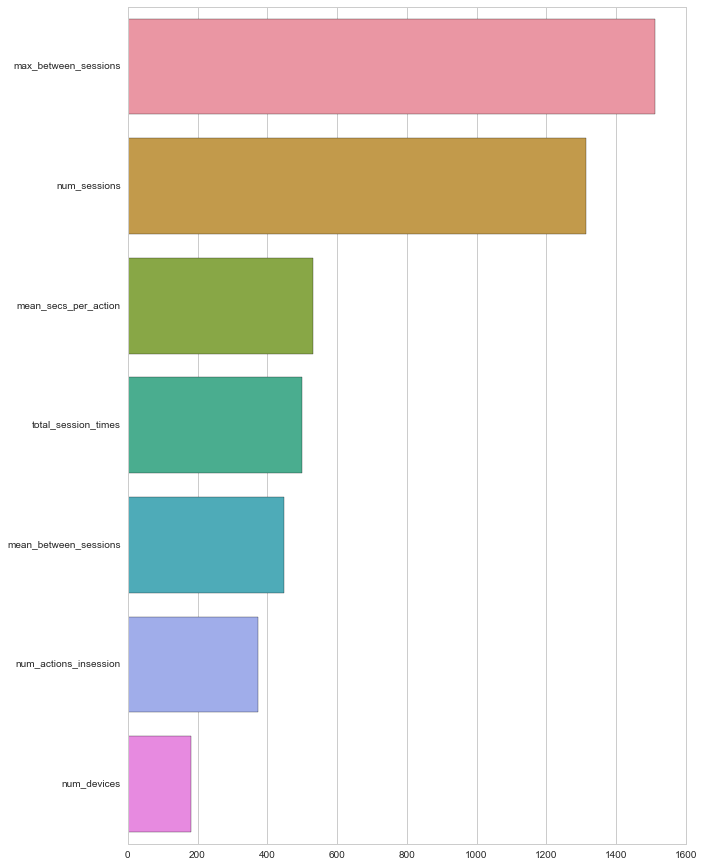

In [404]:
k = 10
plt.figure(figsize=(10,15))
sns.barplot(y=FeatureScores.index[0:k],x=FeatureScores.head(k))
#plt.xticks(rotation = 90)

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


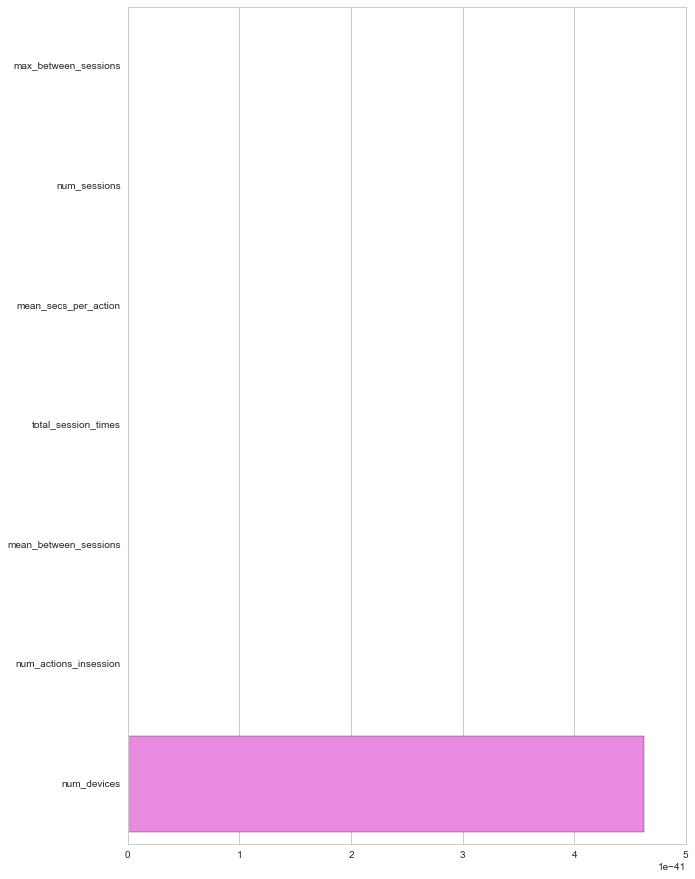

In [411]:
k = 10
plt.figure(figsize=(10,15))
sns.barplot(y=FeaturePvalues.index[0:k],x=FeaturePvalues.tail(k))
#plt.xticks(rotation = 90)

In [261]:
X.drop('country_destination',axis=1,inplace=True)

In [267]:
y.shape

(503,)

In [233]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [414]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)
print(sum(pca.explained_variance_ratio_))


0.988294340713


In [415]:
Xpca = pca.transform(X)

In [66]:
user['minutes_elapsed']=user['secs_elapsed']/60
user['hours_elapsed']=user['secs_elapsed']/3600
user['days_elapsed']=user['secs_elapsed']/(3600*24)

c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [ ]:
user['num_sesso']

In [70]:
#np.sum
(user[user['hours_elapsed']<=2]['minutes_elapsed'])

7531832    28.466667
7531834    20.383333
7531835     0.433333
7531836    14.116667
7531837    20.500000
7531838     2.483333
7531839     9.750000
7531840    14.083333
7531841     0.000000
7531842     0.366667
7531844     0.500000
7531845    11.233333
7531846     2.950000
7531847     0.816667
7531850     2.950000
7531852    72.316667
7531853     2.083333
7531854     2.083333
7531857    12.000000
7531858    14.116667
7531860    20.416667
7531861     0.600000
7531862    28.766667
7531863     4.050000
7531864     0.566667
7531867    17.500000
7531868     0.750000
7531869    25.516667
7531870     2.833333
7531871     0.883333
7531873    18.016667
7531874     1.383333
7531875    37.050000
7531876     1.700000
7531877     1.516667
7531880    18.416667
7531881     1.800000
7531882    38.233333
7531883     3.200000
7531884     0.150000
7531885    54.866667
7531887    22.650000
7531888     0.650000
7531889    33.216667
7531890     2.983333
7531891     0.766667
7531892     0.050000
7531894    44

In [54]:
user_af.loc[unique_ids[1],'avg_session_time'] = np.mean(user[user['hours_elapsed']>10]['hours_elapsed'])

20.880166666666668

In [51]:
user_af.loc[unique_ids[1],'num_sessions'] = sum(user['hours_elapsed']>10) + 1

user_af.loc[unique_ids[1],'avg_time_between_sessions'] = np.mean(user[user['hours_elapsed']>10]['hours_elapsed'])

user_af.loc[unique_ids[1],'avg_session_time'] = np.mean(user[user['hours_elapsed']>10]['hours_elapsed'])


user_af.loc[unique_ids[1],'num_days'] = sum(user['days_elapsed']>1)

user_af.loc[unique_ids[1]]

num_sessions                5.000000
num_days                    2.000000
num_separate_days_active    6.788692
Name: 0010k6l0om, dtype: float64

num_sessions                6.000000
num_days                    6.788692
num_separate_days_active    6.788692
Name: 0010k6l0om, dtype: float64

In [ ]:
#Number of days since first active

In [ ]:
X = pd.merge(airbnb_df,session_grouped,left_on='id',right_index=True,how='inner')
X.info()

In [ ]:
Y = pd.merge(test_df,session_grouped,left_on='id',right_index=True,how='inner')
Y.info()

In [ ]:
X.head()

In [ ]:
X['booked'] = X['country_destination']!='NDF'
sns.violinplot(data = X[X['action']<200], y = 'action',x = 'booked')
plt.xlabel('number of actions')

In [ ]:
X['booked'] = X['country_destination']!='NDF'
sns.violinplot(data = X[X['secs_elapsed']<1e7], y = 'secs_elapsed',x = 'booked')
plt.xlabel('number of actions')

In [ ]:

plt.scatter(X['booked'],X['secs_elapsed'],alpha=0.5)


In [ ]:

plt.scatter(X['action'],X['secs_elapsed'],c=X['booked'])
plt.legend(['No booking','Booked'])

In [ ]:
sns.distplot(X['action'],c=)

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
sns.distplot(X[X['booked']==True]['secs_elapsed'],hist_kws={"normed":1})
sns.distplot(X[X['booked']==False]['secs_elapsed'],color='y',hist_kws={"normed":1})

In [ ]:
print(sum(X['booked']))
len(X)

In [ ]:
session_df.columns

In [ ]:
A = session_df.groupby(['action','action_type']).count()['user_id'].sort_values(ascending=False)
A

In [ ]:
print(len(A[A>100]))
print(A[A>100])